In [9]:
from pymongo import MongoClient
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import squarify

In [10]:
client = MongoClient("mongodb://localhost:27017/")
db = client["STUDENTGUIDE"]

 أعلى 10 عملاء من حيث قيمة المشتريات 💰
----------------------------------------
   CustomerID  CustomerName  TotalPrice
0       542.0   محمد المصري   2798331.0
1       404.0       حسن علي   2707749.0
2       518.0  ياسمين السيد   2577782.0
3       716.0  ياسمين رمضان   2523841.0
4       432.0   محمد المصري   2432291.0
5       387.0      خالد علي   2414157.0
6       437.0   خالد النجار   2396548.0
7       329.0   ياسمين حسين   2354688.0
8       230.0     خالد حسين   2348607.0
9       982.0   عمر عبدالله   2313078.0


C:\Users\C.M™\AppData\Local\Temp\ipykernel_10616\901702828.py:32: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\C.M™\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


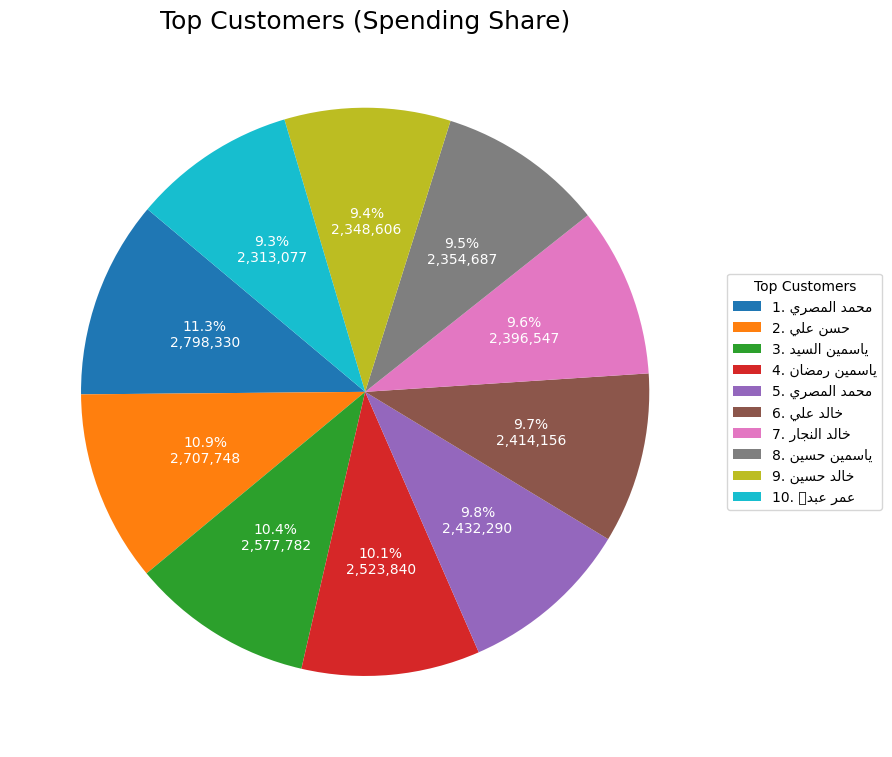

In [11]:
cursor = db["Collection"].find({}, {"CustomerID": 1, "CustomerName": 1, "TotalPrice": 1, "_id": 0})
df_customers = pd.DataFrame(list(cursor))

top_customers = (df_customers.groupby(["CustomerID", "CustomerName"])["TotalPrice"]
                 .sum()
                 .sort_values(ascending=False)
                 .head(10)
                 .reset_index()
)

print(" أعلى 10 عملاء من حيث قيمة المشتريات 💰")
print("----------------------------------------")
print(top_customers)


##############################################################################################################


customer_names = [get_display(arabic_reshaper.reshape(name)) for name in top_customers["CustomerName"]]
total_spent = top_customers["TotalPrice"]

plt.figure(figsize=(9,9))

wedges, texts, autotexts = plt.pie(total_spent, autopct=lambda pct: f"{pct:.1f}%\n{int(pct/100.*sum(total_spent)):,.0f}",textprops=dict(color="white", fontsize=10),startangle=140)

customer_labels = [f"{i+1}. {name}" for i, name in enumerate(customer_names)]


plt.legend(wedges, customer_labels,title="Top Customers",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Top Customers (Spending Share)", fontsize=18)
plt.tight_layout()
plt.show()





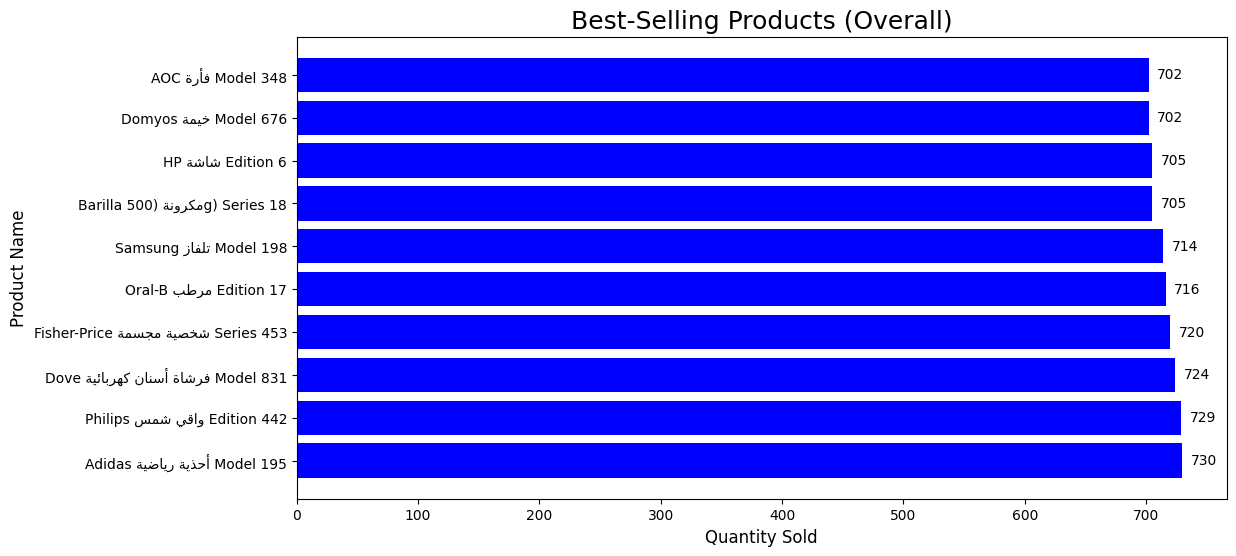

In [12]:
cursor = db["Collection"].find({}, {"ProductID": 1, "ProductName": 1, "Quantity": 1, "_id": 0})
df_products = pd.DataFrame(list(cursor))

# أعلى 10 منتجات
top_products = (df_products.groupby(["ProductID", "ProductName"])["Quantity"]
                .sum()
                .sort_values(ascending=False)
                .head(10)
                .reset_index()
)

# تجهيز الأسماء بالعربي
product_names = [get_display(arabic_reshaper.reshape(name)) for name in top_products["ProductName"]]
quantities = top_products["Quantity"]

# رسم الجرافيك
fig, ax = plt.subplots(figsize=(12,6))
bars = ax.barh(product_names, quantities, color="blue")
ax.set_xlabel("Quantity Sold", fontsize=12)
ax.set_ylabel("Product Name", fontsize=12)
ax.set_title("Best-Selling Products (Overall)", fontsize=18)

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

for bar, value in zip(bars, quantities):
    ax.text(bar.get_width() + (bar.get_width()*0.01), 
            bar.get_y() + bar.get_height()/2, 
            f"{value:,.0f}",
            va="center", fontsize=10)

 أعلى 10 منتجات من حيث المبيعات لكل الفروع 
----------------------------------------------
 BranchID              BranchName                      ProductName  Quantity
     26.0       Mansoura Branch 1  Cambridge كتاب أطفال Series 296      46.0
     91.0           Qena Branch 1     Oxford Non-رواية Edition 164      46.0
     50.0      Port Said Branch 5             Beko ثلاجة Model 584      45.0
     78.0       Damietta Branch 3 Under Armour حقيبة يد Series 201      45.0
     49.0      Port Said Branch 4        Penguin رواية Edition 864      44.0
     90.0 Kafr El Sheikh Branch 5         Penguin رواية Series 350      43.0
     69.0         Assiut Branch 4          HP هاتف ذكي Edition 960      43.0
     25.0          Aswan Branch 5        Acer هاتف ذكي Edition 715      43.0
     34.0          Tanta Branch 4   Barilla قهوة (500g) Series 639      43.0
     81.0        Sharqia Branch 1        Razer دفتر (A5) Model 477      41.0


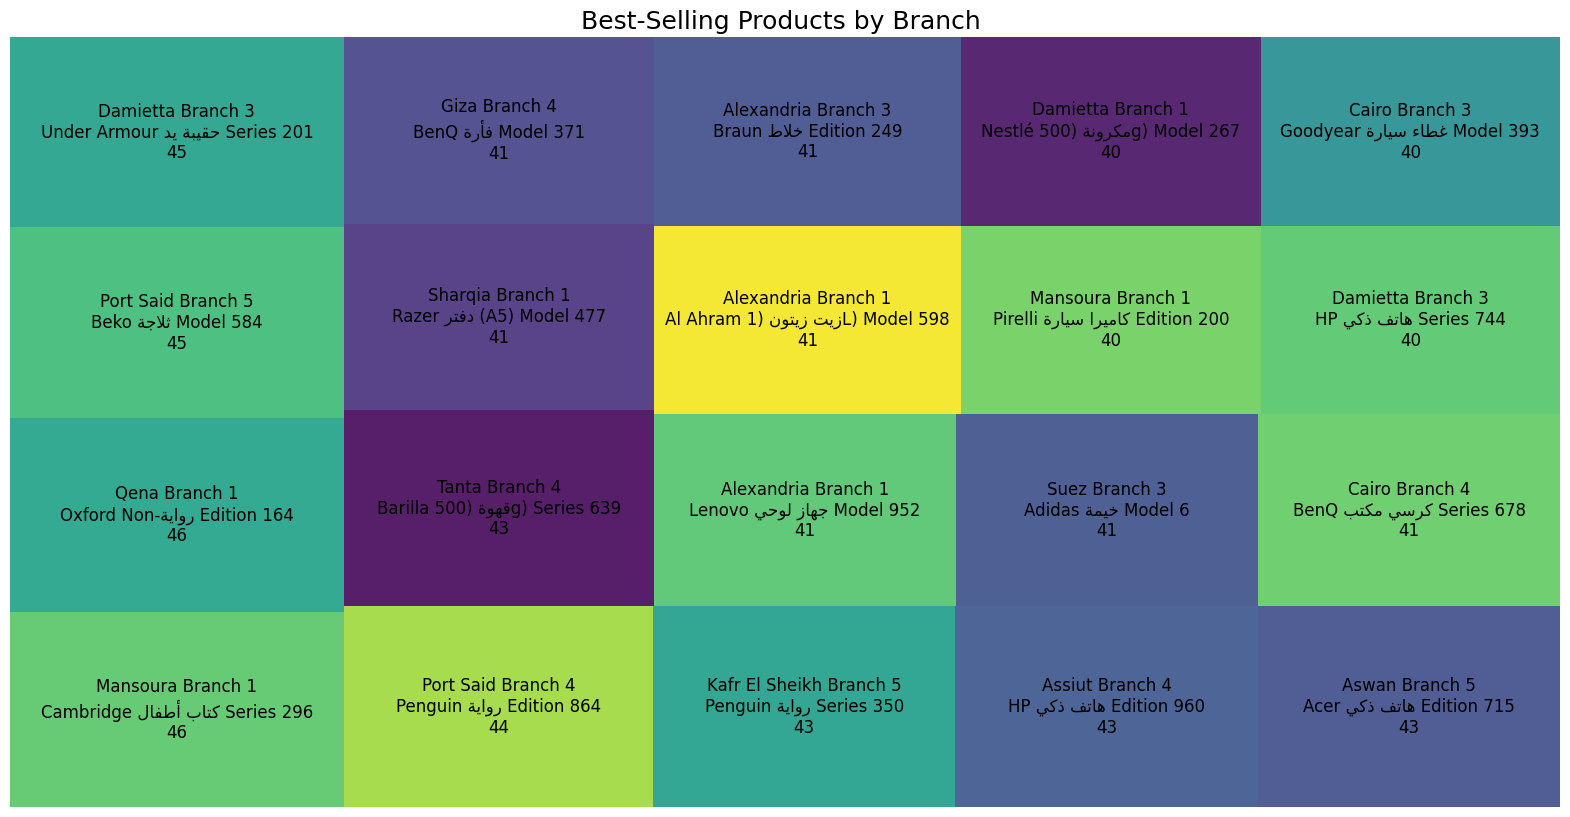

In [21]:
cursor = db["Collection"].find({}, {"BranchID": 1, "BranchName": 1, "ProductName": 1, "Quantity": 1, "_id": 0})
df_branch_products = pd.DataFrame(list(cursor))

top_branch_products = (df_branch_products.groupby(["BranchID", "BranchName", "ProductName"])["Quantity"]
                       .sum()
                       .sort_values(ascending=False)
                       .head(10)
                       .reset_index()
)

print(" أعلى 10 منتجات من حيث المبيعات لكل الفروع ")
print("----------------------------------------------")
print(top_branch_products.to_string(index=False))


############################################################################################################################################

def fix_arabic(text):
    return get_display(arabic_reshaper.reshape(str(text)))


cursor = db["Collection"].find({}, {"BranchID": 1, "BranchName": 1, "ProductName": 1, "Quantity": 1, "_id": 0})
df_branch_products = pd.DataFrame(list(cursor))


top_branch_products = (df_branch_products.groupby(["BranchID", "BranchName", "ProductName"])["Quantity"]
                       .sum()
                       .sort_values(ascending=False)
                       .head(20)
                    .reset_index()
)


branch_names = [fix_arabic(name) for name in top_branch_products["BranchName"]]
product_names = [fix_arabic(name) for name in top_branch_products["ProductName"]]
quantities = top_branch_products["Quantity"]


labels = [f"{b}\n{p}\n{q:,.0f}" for b, p, q in zip(branch_names, product_names, quantities)]


plt.figure(figsize=(20, 10))
squarify.plot(sizes=quantities,label=labels,alpha=0.9,text_kwargs={"fontsize":12})
plt.title("Best-Selling Products by Branch ", fontsize=18)
plt.axis("off")
plt.show()



     💰 تحليل الإيرادات حسب الفروع         
------------------------------------------------
 BranchID              BranchName  Total Revenue
     93.0           Qena Branch 3     47376849.0
     55.0           Suez Branch 5     46760907.0
     44.0         Fayoum Branch 4     46511349.0
     26.0       Mansoura Branch 1     46322839.0
     15.0     Alexandria Branch 5     46301295.0
     89.0 Kafr El Sheikh Branch 4     46002014.0
     47.0      Port Said Branch 2     45782109.0
     13.0     Alexandria Branch 3     45604383.0
     98.0        Gharbia Branch 3     45597042.0
     25.0          Aswan Branch 5     45458566.0
     34.0          Tanta Branch 4     45123683.0
     78.0       Damietta Branch 3     44939608.0
     29.0       Mansoura Branch 4     44733772.0
      3.0          Cairo Branch 3     44555327.0
     61.0          Sohag Branch 1     44323451.0
     11.0     Alexandria Branch 1     44129091.0
     21.0          Aswan Branch 1     44102290.0
     86.0 Kafr El Sheikh B

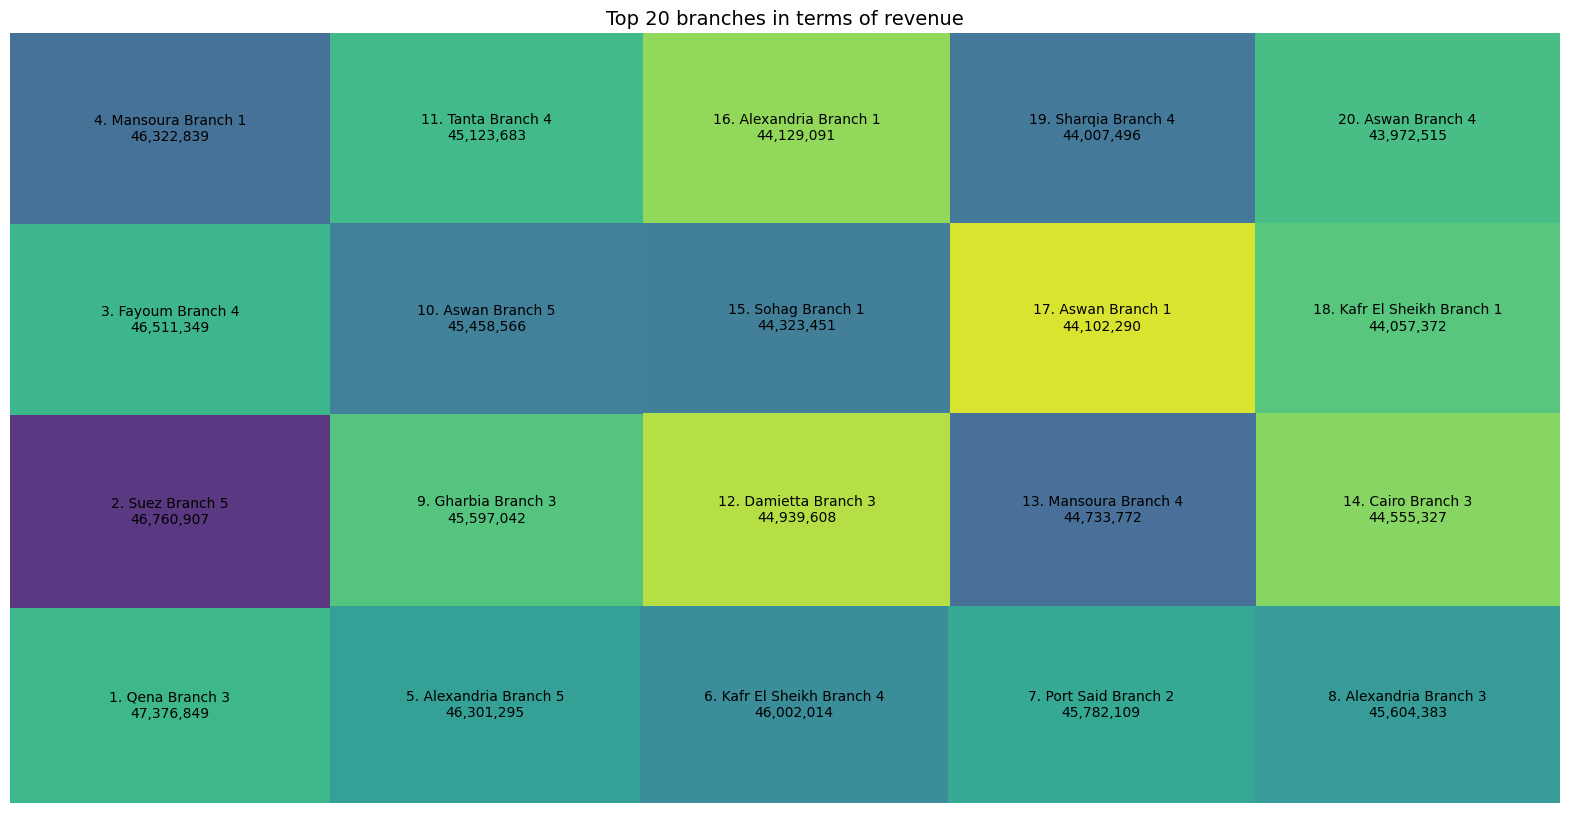

In [14]:
cursor = db["Collection"].find({},{"BranchID": 1, "BranchName": 1, "Quantity": 1, "Price": 1, "_id": 0})
df_branch = pd.DataFrame(list(cursor))


df_branch["Revenue"] = df_branch["Quantity"] * df_branch["Price"]


branch_comparisons = (df_branch.groupby(["BranchID", "BranchName"])["Revenue"]
                      .sum()
                      .reset_index()
                      .rename(columns={"Revenue": "Total Revenue"})
                      .sort_values("Total Revenue", ascending=False)
)

print("     💰 تحليل الإيرادات حسب الفروع         ")
print("------------------------------------------------")
print(branch_comparisons.to_string(index=False))


#######################################################################################################


def fix_arabic(text):
    return get_display(arabic_reshaper.reshape(str(text)))

cursor = db["Collection"].find({}, {"BranchID": 1, "BranchName": 1, "Quantity": 1, "Price": 1, "_id": 0})
df_branch = pd.DataFrame(list(cursor))



df_branch["Revenue"] = df_branch["Quantity"] * df_branch["Price"]


branch_comparisons = (df_branch.groupby(["BranchID", "BranchName"])["Revenue"].sum().reset_index().rename(columns={"Revenue": "Total Revenue"}).sort_values("Total Revenue", ascending=False))


top20_branches = branch_comparisons.head(20).reset_index(drop=True)


labels = [
    f"{i+1}. {fix_arabic(branch)}\n{rev:,.0f}"
    for i, (branch, rev) in enumerate(zip(top20_branches["BranchName"], top20_branches["Total Revenue"]))
]


sizes = top20_branches["Total Revenue"]


plt.figure(figsize=(20, 10))
squarify.plot(sizes=sizes,label=labels,alpha=0.9,text_kwargs={"fontsize": 10})
plt.title("Top 20 branches in terms of revenue", fontsize=14)
plt.axis("off")
plt.show()


📈 تحليل المبيعات شهريًا
-------------------------
   SaleDate  TotalPrice
18  2025-07  72803357.0
19  2025-08  72371487.0
6   2024-07  71237525.0
5   2024-06  71046966.0
14  2025-03  70582860.0
12  2025-01  70515712.0
4   2024-05  70281730.0
0   2024-01  69884142.0
7   2024-08  69560025.0
17  2025-06  69462400.0
11  2024-12  69047112.0
15  2025-04  68780263.0
2   2024-03  68757411.0
16  2025-05  68712069.0
8   2024-09  68644006.0
3   2024-04  67870741.0
10  2024-11  67725530.0
13  2025-02  64990437.0
1   2024-02  64165099.0
9   2024-10  62783987.0
20  2025-09  13621878.0


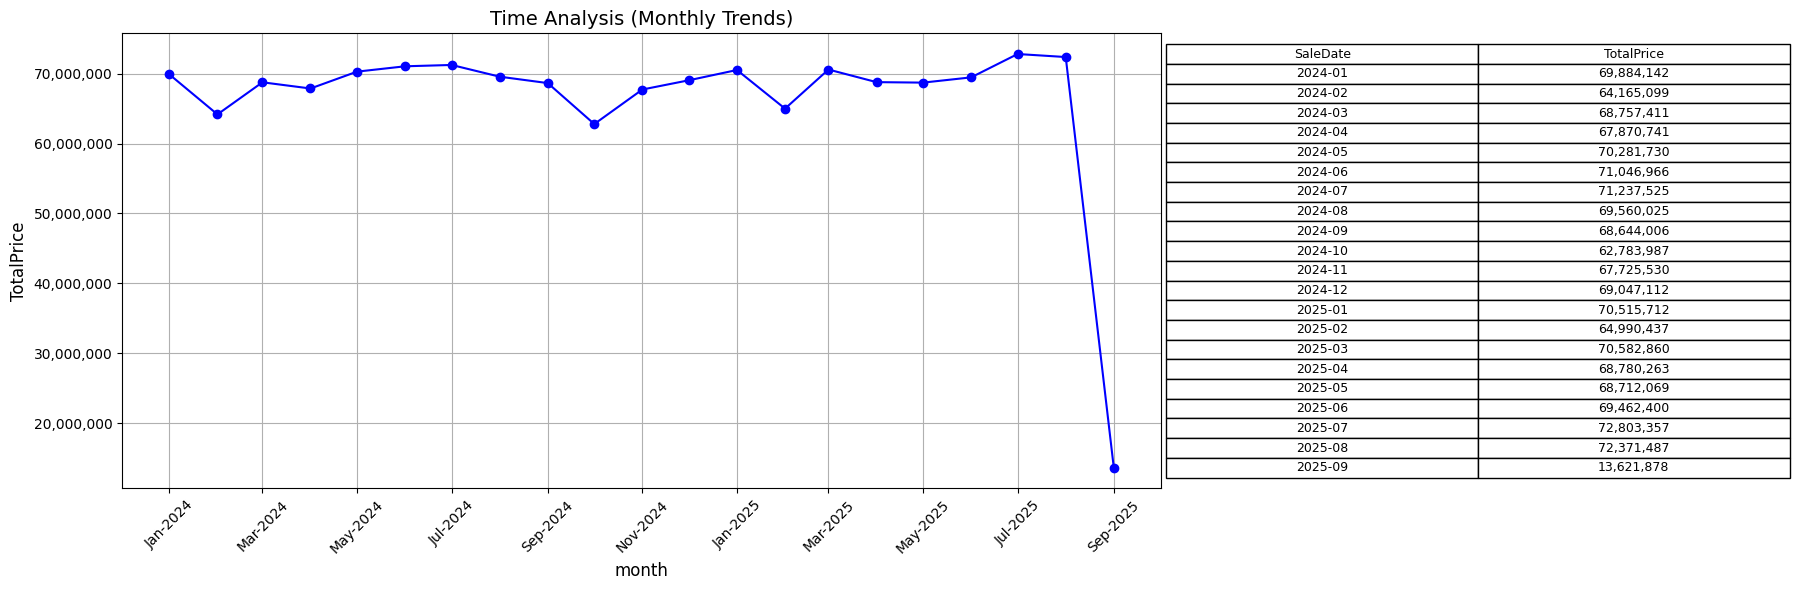

In [15]:
cursor = db["Collection"].find({}, {"SaleDate": 1, "TotalPrice": 1, "_id": 0})
df_sales = pd.DataFrame(list(cursor))

df_sales["SaleDate"] = pd.to_datetime(df_sales["SaleDate"])


monthly_sales = (df_sales.groupby(df_sales["SaleDate"].dt.to_period("M"))["TotalPrice"]
                 .sum()
                 .reset_index()
                 .sort_values("TotalPrice", ascending=False)
)

print("📈 تحليل المبيعات شهريًا")
print("-------------------------")
print(monthly_sales)


#################################################################################################


monthly_sales["SaleDate"] = monthly_sales["SaleDate"].dt.to_timestamp()


monthly_sales = monthly_sales.sort_values("SaleDate")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6), gridspec_kw={'width_ratios':[2,1]})


ax1.plot(monthly_sales["SaleDate"], monthly_sales["TotalPrice"],
         marker="o", linestyle="-", color="blue")

ax1.set_xlabel("month", fontsize=12)
ax1.set_ylabel("TotalPrice", fontsize=12)
ax1.set_title("Time Analysis (Monthly Trends)", fontsize=14)


ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))


ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
plt.setp(ax1.get_xticklabels(), rotation=45)

ax1.grid(True)


table_data = monthly_sales[["SaleDate", "TotalPrice"]].copy()
table_data["SaleDate"] = table_data["SaleDate"].dt.strftime("%Y-%m")  # صياغة التاريخ
table_data["TotalPrice"] = table_data["TotalPrice"].apply(lambda x: f"{int(x):,}")


ax2.axis("off")
tbl = ax2.table(cellText=table_data.values,
                colLabels=table_data.columns,
                cellLoc="center",
                loc="center")

tbl.auto_set_font_size(False)
tbl.set_fontsize(9)
tbl.scale(1.2, 1.2)  

plt.tight_layout()
plt.show()




 🌦️ تحليل المبيعات الموسمية
------------------------------
   Season   TotalPrice
2  Summer  426481760.0
1  Spring  414985074.0
3  Winter  338602502.0
0  Autumn  212775401.0


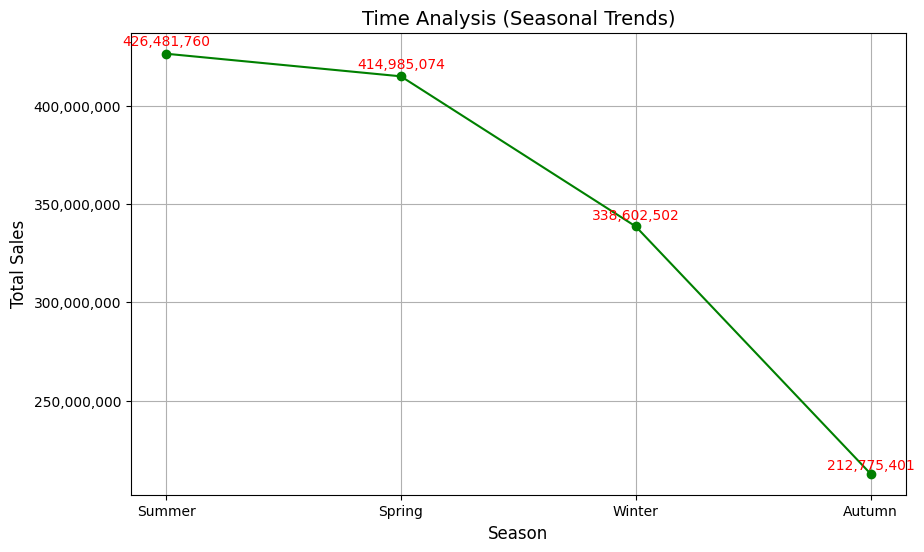

In [16]:
df_sales["Month"] = df_sales["SaleDate"].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

df_sales["Season"] = df_sales["Month"].apply(get_season)


seasonal_sales = (df_sales.groupby("Season")["TotalPrice"]
                  .sum()
                  .reset_index()
                  .sort_values("TotalPrice", ascending=False)
)

print(" 🌦️ تحليل المبيعات الموسمية")
print("------------------------------")
print(seasonal_sales)


###########################################################################


seasonal_sales = seasonal_sales.sort_values("TotalPrice", ascending=False)

plt.figure(figsize=(10,6))
plt.plot(seasonal_sales["Season"], seasonal_sales["TotalPrice"],
         marker="o", linestyle="-", color="green")

plt.xlabel("Season", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Time Analysis (Seasonal Trends)", fontsize=14)


plt.gca().yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f"{int(x):,}")
)

for i, value in enumerate(seasonal_sales["TotalPrice"]):
    plt.text(seasonal_sales["Season"].iloc[i], value + (value*0.01),
             f"{int(value):,}", ha="center", fontsize=10, color="red")

plt.grid(True)
plt.show()


C:\Users\C.M™\AppData\Local\Temp\ipykernel_10616\1953458330.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Season")


             🌦️ أفضل 1 منتج لكل موسم (الأعلى طلبًا)               
----------------------------------------------------------------------
   Season  ProductID                           ProductName  TotalPrice
0  Winter       92.0       Galaxy مكرونة (500g) Series 150    612692.0
1  Spring      217.0               Garnier شامبو Model 713    785084.0
2  Summer      889.0         Adidas أحذية رياضية Model 195    806331.0
3  Autumn      423.0  Nestlé تونة معلبة (170g) Edition 122    456396.0


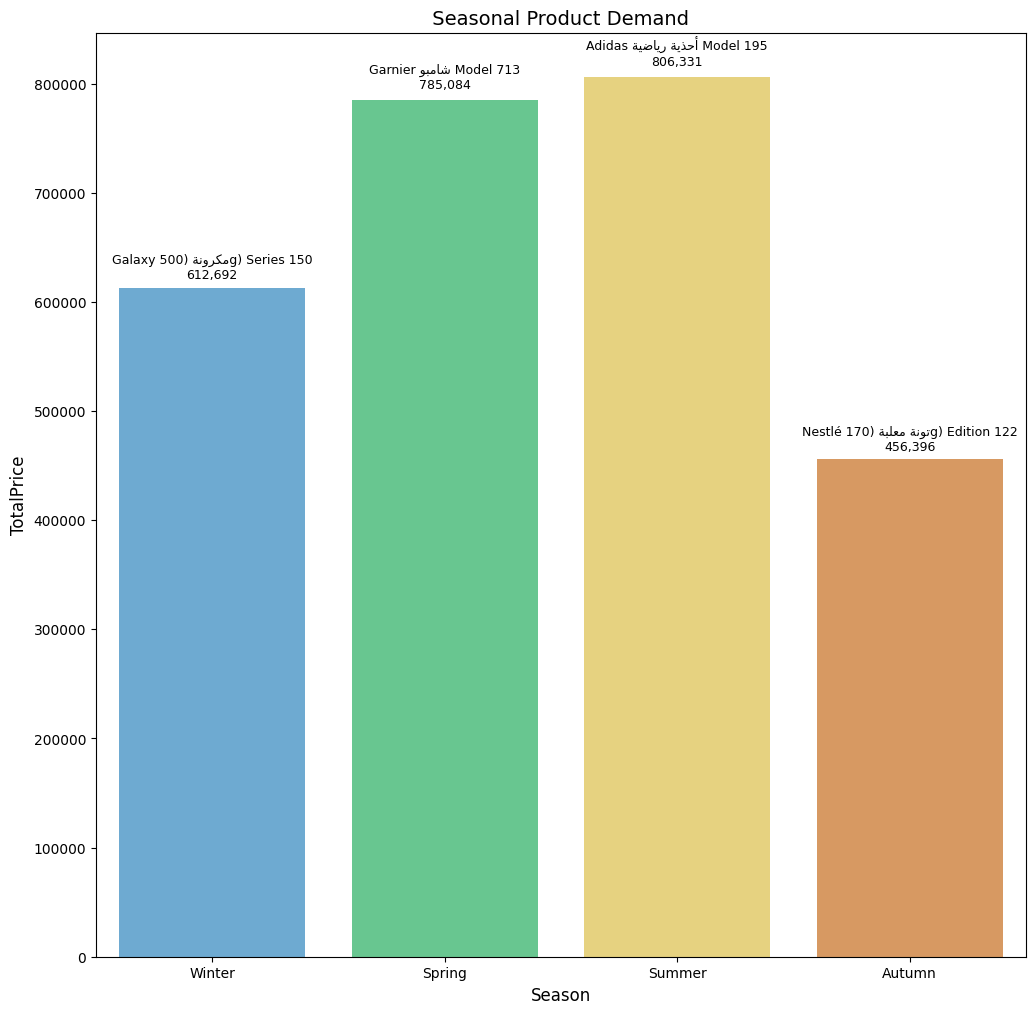

In [17]:
cursor = db["Collection"].find({}, {"ProductID": 1, "ProductName": 1, "TotalPrice": 1, "SaleDate": 1, "_id": 0})
df_products = pd.DataFrame(list(cursor))


df_products["SaleDate"] = pd.to_datetime(df_products["SaleDate"])
df_products["Month"] = df_products["SaleDate"].dt.month


def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

df_products["Season"] = df_products["Month"].apply(get_season)


seasonal_products = (df_products.groupby(["Season", "ProductID", "ProductName"])["TotalPrice"]
                     .sum()
                    .reset_index()
)


seasonal_products["Season"] = pd.Categorical(seasonal_products["Season"],
    categories=["Winter", "Spring", "Summer", "Autumn"],
    ordered=True
)


top_products_per_season = (seasonal_products.sort_values(["Season", "TotalPrice"], ascending=[True, False])
                           .groupby("Season")
                           .head(1)
                           .reset_index(drop=True)
)

print("             🌦️ أفضل 1 منتج لكل موسم (الأعلى طلبًا)               ")
print("----------------------------------------------------------------------")
print(top_products_per_season)


###############################################################################################################################################################################################


def fix_arabic(text):
    try:
        return get_display(arabic_reshaper.reshape(str(text)))
    except:
        return str(text)


top_products_per_season["ProductName"] = top_products_per_season["ProductName"].apply(fix_arabic)


plt.figure(figsize=(12,12))
sns.barplot(data=top_products_per_season,x="Season",y="TotalPrice",hue="Season",dodge=False,palette={"Winter":"#5DADE2","Spring":"#58D68D","Summer":"#F7DC6F","Autumn":"#EB984E"})


for i, row in top_products_per_season.iterrows():
    plt.text(
        i, row["TotalPrice"] + (row["TotalPrice"]*0.01),
        f"{row['ProductName']}\n{row['TotalPrice']:,.0f}",
        ha="center", va="bottom", fontsize=9
    )

plt.title(" Seasonal Product Demand ", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("TotalPrice", fontsize=12)
plt.show()


⭐ المنتجات الخمسة الأكثر احتياجًا على مستوى جميع الفروع 🏬📊
-----------------------------------------------------------------
 ProductID                         ProductName  Quantity
     889.0       Adidas أحذية رياضية Model 195     730.0
     418.0        Philips واقي شمس Edition 442     729.0
     153.0 Dove فرشاة أسنان كهربائية Model 831     724.0
      42.0 Fisher-Price شخصية مجسمة Series 453     720.0
     480.0              Oral-B مرطب Edition 17     716.0


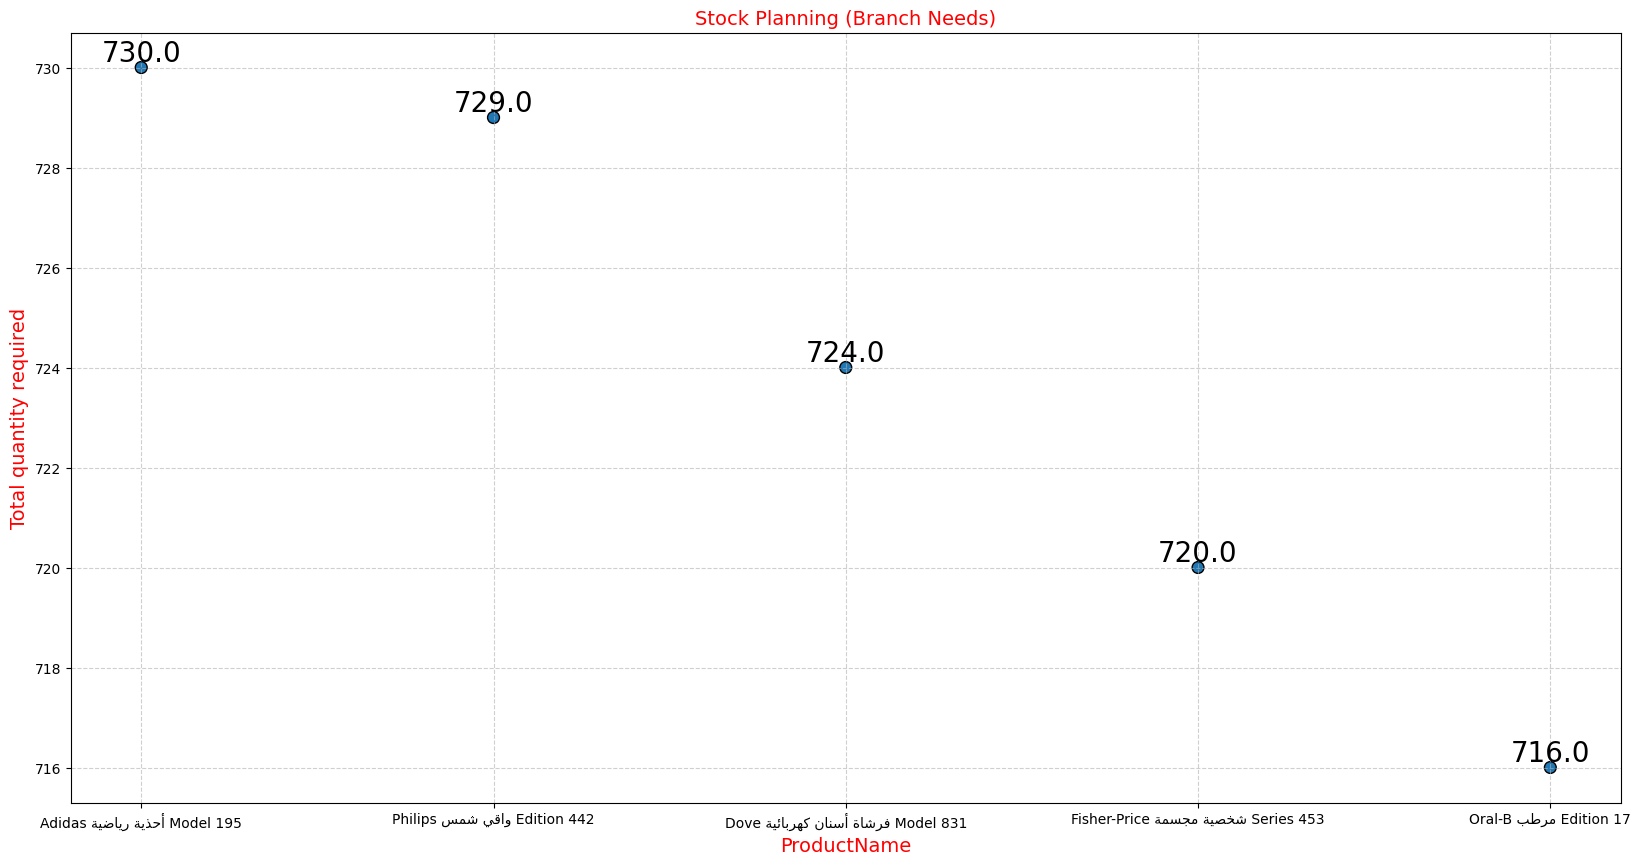

In [18]:
cursor = db["Collection"].find({}, {"BranchID": 1, "BranchName": 1, "ProductID": 1, "ProductName": 1, "Quantity": 1, "_id": 0})
df_branch_needs = pd.DataFrame(list(cursor))

product_demand = (df_branch_needs.groupby(["ProductID", "ProductName"])["Quantity"]
                  .sum()
                  .reset_index()
)


top_product = product_demand.sort_values("Quantity", ascending=False).head()

print("⭐ المنتجات الخمسة الأكثر احتياجًا على مستوى جميع الفروع 🏬📊")
print("-----------------------------------------------------------------")
print(top_product.to_string(index=False))


#######################################################################################################################################




def fix_arabic(text):
    return get_display(arabic_reshaper.reshape(str(text)))


top_product["ProductName_fixed"] = top_product["ProductName"].apply(fix_arabic)




plt.figure(figsize=(20, 10))
plt.scatter(top_product["ProductName_fixed"],top_product["Quantity"],s=top_product["Quantity"] / 10,   edgecolors="k" )


for i, qty in enumerate(top_product["Quantity"]):
    plt.text(top_product["ProductName_fixed"].iloc[i], qty,
             f"{qty:,}", ha="center", va="bottom", fontsize=20)
    


plt.title("Stock Planning (Branch Needs)", fontsize=14,color="red")
plt.xlabel("ProductName",fontsize=14,color="red")
plt.ylabel("Total quantity required",fontsize=14,color="red")
plt.grid(True, linestyle="--", alpha=0.6)
